In [21]:
# Import some libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import scipy.sparse as sps
from scipy.sparse import csr_matrix

In [22]:
def read_review_data(file_name):
    review_data = pd.read_csv(file_name)
    print "Sample Data"
    print "-----------"
    print review_data.sample(5)
    return review_data

In [23]:
business_data = pd.read_csv('business.csv')
business_data.head(1)

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,11:0-21:0,False,NaN,NaN,NaN,T2E 6L6,NaN,11:0-21:0,NaN,Calgary,...,casual,NaN,NaN,NaN,NaN,True,"{'BusinessParking': ""{'garage': False, 'street...",True,False,False


In [24]:
business_data.set_index('business_id', inplace = True)

In [25]:
def get_restaurant_data(review_data, business_data):
    review_data['city'] = review_data.apply(lambda x: business_data.loc[x['business_id'], 'city'], axis=1)
    review_data['cat'] = review_data.apply(lambda x: business_data.loc[x['business_id'], 'categories'], axis=1)
    restaurant_reviews = review_data[review_data['cat'].str.contains("Restaurants",na=False)]
    return restaurant_reviews

In [26]:
def get_city_restaurant_data(city, restaurant_reviews):
    city_rest_data = restaurant_reviews.loc[review_data['city'] == city]
    return city_rest_data

In [27]:
review_data = read_review_data('40core.csv')
print '-----------------------------'
print 'Filtering the Restaurant data'
print '-----------------------------'
restaurant_reviews = get_restaurant_data(review_data, business_data)
print restaurant_reviews.head(3)
print '-----------------------------'
print 'restaurant reviews top 10 cities'
print '-----------------------------'
print restaurant_reviews['city'].value_counts().head(10)
print '-----------------------------'
vegas_40 = get_city_restaurant_data('Las Vegas', restaurant_reviews)

Sample Data
-----------
                      user_id             business_id  stars
62987  iS4NVHLQDt1IzmmMKqwy5A  ugf6qjoG5h6VXR5-vpq0Qw      4
58296  C_hUvw2z0R-Rv0yZb6QCZA  osu1j_Lg8R9brpuMMn3a3A      4
30575  5Wg5OanfZ4-2dCxEo-qjsw  3GEEy7RP6e4bT4LAiWFMFQ      2
70489  f_5VRh79aew1cVWUmC1PJA  cOKf37Wb1oKc9X1Q5GHxsQ      5
80204  qewG3X2O4X6JKskxyyqFwQ  t6WY1IrohUecqNjd9bG42Q      3
-----------------------------
Filtering the Restaurant data
-----------------------------
                  user_id             business_id  stars       city  \
0  AuIK5tF2GjO7SftHawTLKw  I-5qHCVwT7k_KH67-YOx3A      4  Henderson   
2  AuIK5tF2GjO7SftHawTLKw  Zmfq3DVhHdtVChhSxzoUHw      4  Las Vegas   
3  AuIK5tF2GjO7SftHawTLKw  pybIuTluqRhH_BQ3CJHlLw      5  Las Vegas   

                                                 cat  
0  Desserts, Restaurants, American (Traditional),...  
2                                  Restaurants, Thai  
3                                  Thai, Restaurants  
---------------

In [28]:
vegas_40.head()

,user_id,business_id,stars,city,cat
2,AuIK5tF2GjO7SftHawTLKw,Zmfq3DVhHdtVChhSxzoUHw,4,Las Vegas,"Restaurants, Thai"
3,AuIK5tF2GjO7SftHawTLKw,pybIuTluqRhH_BQ3CJHlLw,5,Las Vegas,"Thai, Restaurants"
4,AuIK5tF2GjO7SftHawTLKw,SycXTaA4MeJZuDK4Y1owDQ,3,Las Vegas,"Burgers, Restaurants, Bars, Nightlife, Sports ..."
5,AuIK5tF2GjO7SftHawTLKw,5shgJB7a-2_gdnzc0gsOtg,5,Las Vegas,"Restaurants, Tapas/Small Plates, Tapas Bars"
6,AuIK5tF2GjO7SftHawTLKw,UvF68aNDfzCWQbxO6-647g,3,Las Vegas,"Restaurants, Vietnamese, Sandwiches"


In [29]:
vegas_40.reset_index(inplace=True)

In [30]:
cols = ['index', 'cat', 'city']
vegas_40.drop(cols, inplace=True, axis=1)

In [31]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [32]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(vegas_40[['user_id', 'business_id', 'stars']], reader)

In [15]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
algorithm = KNNWithMeans(sim_options=sim_options, k=40)
trainset, testset = train_test_split(data, test_size=0.25)
predictions = algorithm.fit(trainset).test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [16]:
accuracy.mae(predictions)

MAE:  0.8993


0.8993226671956376

In [17]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
algorithm = KNNWithMeans(sim_options=sim_options, k=50)
predictions = algorithm.fit(trainset).test(testset)
accuracy.mae(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992


0.8992403657562748

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8993
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992


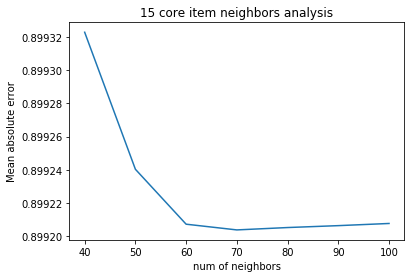

In [19]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
plt.plot(k_list, res)
plt.title('15 core item neighbors analysis')
plt.xlabel('num of neighbors')
plt.ylabel('Mean absolute error')
plt.show()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9077
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9074


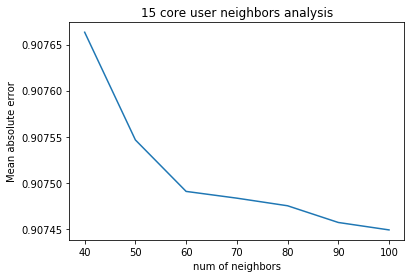

In [20]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
plt.plot(k_list, res)
plt.title('15 core user neighbors analysis')
plt.xlabel('num of neighbors')
plt.ylabel('Mean absolute error')
plt.show()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8993
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992


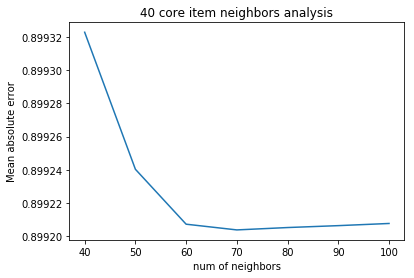

In [33]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
plt.plot(k_list, res)
plt.title('40 core item neighbors analysis')
plt.xlabel('num of neighbors')
plt.ylabel('Mean absolute error')
plt.show()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9077
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9074


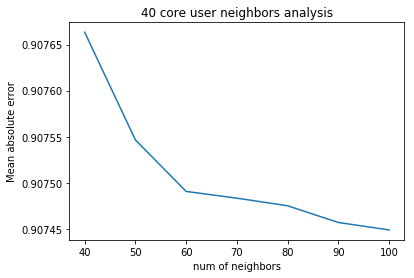

In [34]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
plt.plot(k_list, res)
plt.title('40 core user neighbors analysis')
plt.xlabel('num of neighbors')
plt.ylabel('Mean absolute error')
plt.show()